In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use(["seaborn-darkgrid", "seaborn-colorblind", "seaborn-notebook"])

In [21]:
import pandas as pd
basedir = "./PaDa/PaDa.Task3.MergeSort/bin/Debug/"
tpl = pd.read_csv(basedir + "parallel-naive-tpl-merge.csv", header=None, names=["Size", "Time"])
tpl["Algo"] = "Parallel TPL"
thead_pool = pd.read_csv(basedir + "parallel-naive-threadpool-merge.csv", header=None, names=["Size", "Time"])
thead_pool["Algo"] = "Parallel thread pool"
seq = pd.read_csv(basedir + "sequential.csv", header=None, names=["Size", "Time"])
seq["Algo"] = "Sequential"

_all = pd.concat([tpl, thead_pool, seq])

In [22]:
import datetime as dt

def ms_to_time(time_ms):
    time_ms = int(time_ms)
    ms = time_ms % 1000
    time_ms //= 1000
    sec = time_ms%60
    time_ms //= 60
    minutes = time_ms%60
    time_ms //= 60
    hours = time_ms
    return dt.time(hour=hours, minute=minutes, second=sec, microsecond=ms, tzinfo=None)

_all["Real Time"] = _all.apply(lambda row: ms_to_time(row["Time"]), axis=1)

C:\Users\Anatoliy\Anaconda2\envs\py35\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


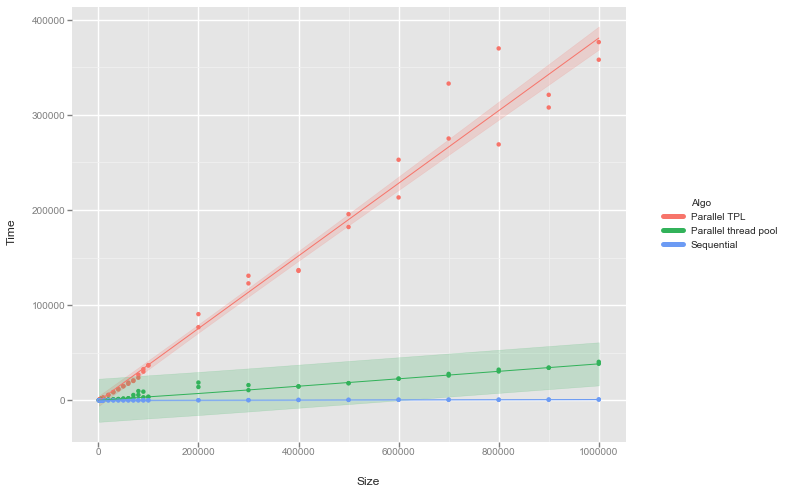

<ggplot: (-9223371997056211452)>

In [34]:
from ggplot import *

ggplot(_all, aes(x='Size', y='Time', color='Algo')) + \
    geom_point() + \
    stat_smooth(ma=12)